In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno

# 전처리 및 머신 러닝 알고리즘
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler as StandardScaler

# 모델 튜닝 및 평가
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_predict
from sklearn import model_selection
import lightgbm as Light_GBM
from sklearn.metrics import accuracy_score


# 경고 제거 (판다스가 에러 메세지를 자주 만들어 내기 때문에 이를 일단 무시하도록 설정합니다.)
import sys
import warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load Data as 
test = pd.read_csv('../../../input/wine_quality/data/test.csv')
train = pd.read_csv('../../../input/wine_quality/data/train.csv')

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5497 entries, 0 to 5496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 5497 non-null   int64  
 1   quality               5497 non-null   int64  
 2   fixed acidity         5497 non-null   float64
 3   volatile acidity      5497 non-null   float64
 4   citric acid           5497 non-null   float64
 5   residual sugar        5497 non-null   float64
 6   chlorides             5497 non-null   float64
 7   free sulfur dioxide   5497 non-null   float64
 8   total sulfur dioxide  5497 non-null   float64
 9   density               5497 non-null   float64
 10  pH                    5497 non-null   float64
 11  sulphates             5497 non-null   float64
 12  alcohol               5497 non-null   float64
 13  type                  5497 non-null   object 
dtypes: float64(11), int64(2), object(1)
memory usage: 601.4+ KB


In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 1000 non-null   int64  
 1   fixed acidity         1000 non-null   float64
 2   volatile acidity      1000 non-null   float64
 3   citric acid           1000 non-null   float64
 4   residual sugar        1000 non-null   float64
 5   chlorides             1000 non-null   float64
 6   free sulfur dioxide   1000 non-null   float64
 7   total sulfur dioxide  1000 non-null   float64
 8   density               1000 non-null   float64
 9   pH                    1000 non-null   float64
 10  sulphates             1000 non-null   float64
 11  alcohol               1000 non-null   float64
 12  type                  1000 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 101.7+ KB


In [5]:
train.describe()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000,5497.000000
mean,2748.000000,5.818992,7.210115,0.338163,0.318543,5.438075,0.055808,30.417682,115.566491,0.994673,3.219502,0.530524,10.504918
std,1586.991546,0.870311,1.287579,0.163224,0.145104,4.756676,0.034653,17.673881,56.288223,0.003014,0.160713,0.149396,1.194524
min,0.000000,3.000000,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.740000,0.220000,8.000000
25%,1374.000000,5.000000,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,78.000000,0.992300,3.110000,0.430000,9.500000
50%,2748.000000,6.000000,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994800,3.210000,0.510000,10.300000
75%,4122.000000,6.000000,7.700000,0.400000,0.390000,8.100000,0.064000,41.000000,155.000000,0.996930,3.320000,0.600000,11.300000
max,5496.000000,9.000000,15.900000,1.580000,1.660000,65.800000,0.610000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000


In [6]:
train.head()

,index,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white
1,1,5,8.8,0.610,0.14,2.4,0.067,10.0,42.0,0.99690,3.19,0.59,9.5,red
2,2,5,7.9,0.210,0.39,2.0,0.057,21.0,138.0,0.99176,3.05,0.52,10.9,white
3,3,6,7.0,0.210,0.31,6.0,0.046,29.0,108.0,0.99390,3.26,0.50,10.8,white
4,4,6,7.8,0.400,0.26,9.5,0.059,32.0,178.0,0.99550,3.04,0.43,10.9,white


In [7]:
test.head()

,index,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.99380,2.90,0.38,11.6,white
1,1,13.3,0.43,0.58,1.9,0.070,15.0,40.0,1.00040,3.06,0.49,9.0,red
2,2,6.5,0.28,0.27,5.2,0.040,44.0,179.0,0.99480,3.19,0.69,9.4,white
3,3,7.2,0.15,0.39,1.8,0.043,21.0,159.0,0.99480,3.52,0.47,10.0,white
4,4,6.8,0.26,0.26,2.0,0.019,23.5,72.0,0.99041,3.16,0.47,11.8,white


Quality를 분류하는 것이 목표 입니다.

평가 Metric 은 Classification Accuracy 가 되겠습니다. 

이번에는 특별히 Null 값에 대한 전처리가 필요하지 않기에, 더욱이 모델에 대한 공부와 모델 Hyperparmeter Tunning 등을 연습해보면 좋을 것 같습니다.

이번에 함께 사용할 모델 : LightGBM

In [8]:
# for idx in range(len(train['type'])):
#     if train['type'][idx] == 'red' :
#         train['type'][idx] = int(0)
#     elif train['type'][idx] == 'white' :
#         train['type'][idx] = int(1)

# for idx_ in range(len(test['type'])):
#     if test['type'][idx_] == 'red' :
#         test['type'][idx_] = int(0)
#     elif test['type'][idx_] == 'white':
#         test['type'][idx_] = int(1) 

In [9]:
train = train.drop(['index'], axis = 1)

test = test.drop(['index'], axis = 1)
test.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,9.0,0.31,0.48,6.6,0.043,11.0,73.0,0.9938,2.9,0.38,11.6,white


In [10]:
train.head(1)

,quality,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white


In [11]:
y_train = train.iloc[:,[0]] # iloc 시에는 column number 기입
# y_train = train.quality
x_train = train.drop(['quality'], axis=1)

In [12]:
x_train.head(1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,5.6,0.695,0.06,6.8,0.042,9.0,84.0,0.99432,3.44,0.44,10.2,white


In [13]:
y_train.head(1)

,quality
0,5


In [14]:
numerical_columns = train.select_dtypes(exclude='object').columns.tolist()
numerical_columns.remove('quality')
numerical_columns

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [15]:
scaler = StandardScaler()

x_train[numerical_columns] = scaler.fit_transform(x_train[numerical_columns])
x_train['type'] = pd.factorize(x_train['type'])[0]

test[numerical_columns] = scaler.transform(test[numerical_columns])
test['type'] = pd.factorize(test['type'])[0]

<AxesSubplot:>

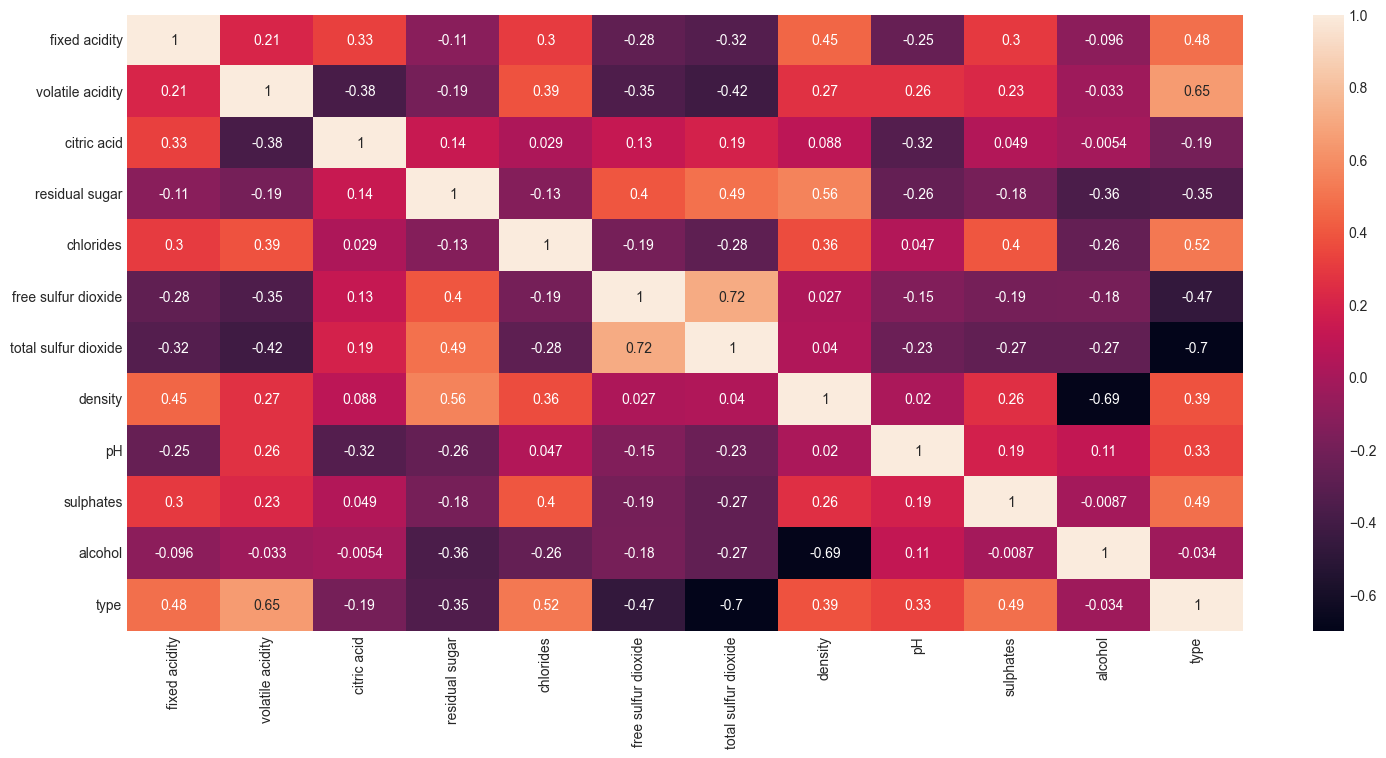

In [16]:
plt.figure(figsize=(18,8))
corr = x_train.corr()
sns.heatmap(corr, annot = True, square=False)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(x_train,y_train, test_size=.2, random_state=42)

In [18]:
def Model(model):
    model.fit(X_train,Y_train)
    score = model.score(X_val,Y_val)
    model_train_score= model.score(X_train,Y_train)
    model_test_score = model.score(X_val,Y_val)
    prediction = model.predict(X_val)
    # cm = confusion_matrix(Y_train, prediction)
    print("Testing Score\n", score)
    print("model train score \n", model_train_score)
    print("model teset score \n", model_test_score)
    # plot_confusion_matrix(model,X_val,Y_train,cmap='OrRd')

In [51]:
#RandomForest
# params = {}
# params['task'] = 'train'
# params['learning_rate'] = 0.0001
# params['boosting_type'] = 'gbdt' 
# # gbdt : Traditional Gradient Boosting Decision Tree
# # rf   : Random Forest
# # dart : Dropouts meet Multiple Additive Regression Trees
# # goss : Gradient-based One-Side Sampling
# params['num_class'] = 10
# params['objective'] = 'multiclass'
# params['metric'] = 'multi_logloss'
# # params['sub_feature'] = 0.5 # Used when handling with overfitting issue
# params['num_leaves'] = 100 # 1< num_leaves < 131072, num of leaves < 2^(max_depth) for preventing overfitting 
# params['min_data'] = 50
# #params['max_depth'] = 10 # -1 means no limit. this is used to deal with over-fitting (when data is small)
# params['num_iterations'] = 1000
# params['seed'] = 42

# # 0.672 모델 -> 0.681
# model = Light_GBM.LGBMClassifier(boosting_type = 'gbdt', num_leaves = 20000, max_depth = -1,
#                             learning_rate = 0.01, num_iterations = 1000, sub_feature = 1.0,
#                             metric = 'multi_logloss', objective = 'multiclass',num_class = 10,
#                             seed = 42)

# model = Light_GBM.LGBMClassifier(boosting_type = 'goss', num_leaves = 20000, max_depth = -1,
#                             learning_rate = 0.01, num_iterations = 10000, sub_feature = 1.0,
#                             metric = 'multi_logloss', objective = 'multiclass',num_class = 10,
#                             seed = 42)

model = Light_GBM.LGBMClassifier(boosting_type = 'goss', num_leaves = 100, max_depth = 9,
                            learning_rate = 0.0001, num_iterations = 10000, sub_feature = 0.9,
                            metric = 'multi_logloss', objective = 'multiclass',num_class = 10,
                            n_estimators=200,
                            seed = 42)
model

LGBMClassifier(boosting_type='goss', max_depth=12, metric='multi_logloss',
               n_estimators=200, num_class=10, num_iterations=1000,
               num_leaves=500, objective='multiclass', seed=42,
               sub_feature=0.9)

boosting Type 관련 

: https://greeksharifa.github.io/machine_learning/2019/12/09/Light-GBM/ 

: https://jeongchul.tistory.com/548

gbdt : 고차원이고 큰 데이터 셋에서는 만족스러운 결과를 내지 못하는 경우도 있음. 왜냐하면 모든 가능한 분할점에 대해 정보 획득을 평가하기 위해 데이터 개체 전부를 스캔해야 하기 때문. 

goss : 기울기가 큰 데이터 개체가 정보 획득에 있어 더욱 큰 역할을 한다는 아이디어에 입각해 만들어진 테크닉이다. 큰 기울기를 갖는 개체들은 유지되며, 작은 기울기를 갖는 데이터 개체들은 일정 확률에 의해 랜덤하게 제거

Dart : MART 의 개선 버전 ???

Hyper Parameter 

num_leaves --> 하나의 트리가 가질수 있는 최대의 leave 개수. 이 개수를 높이면 정확도는 높아지지만 트리의 깊이가 커져 모델의 복잡도가 증가. num of leaves < 2^(max_depth) for preventing overfitting 

n_estimator --> 반복 수행하는 트리의 개수. 너무 크게 지정하면 학습시간 길어지고 과적합 발생. 튜닝시에는 크지 않은 숫자로 지정하는 것이 좋음

Learning rate - num_iterations = learning rate 을 작게 하고 num iteration 을 크게 하면 조금 정교하게 값을 얻을 수도 있다. (항상 그런 것은 아니며, 너무 learning 이 작을 경우 Local minumum 또는 maximum에 빠질 가능 성이 크다)


In [52]:
model.fit(X_train,Y_train)
score = model.score(X_val,Y_val)
model_train_score= model.score(X_train,Y_train)
model_test_score = model.score(X_val,Y_val)
# prediction = model.predict(X_val)

print("Testing Score\n", score)
print("model train score \n", model_train_score)
print("model teset score \n", model_test_score)

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.9. Current value: feature_fraction=0.9
Testing Score
 0.6645454545454546
model train score 
 1.0
model teset score 
 0.6645454545454546


In [394]:
test_scores = []
train_scores = []

for i in range(1,15):
    boosting_type_ = 'goss' # gbdt  #dart
    
    model = Light_GBM.LGBMClassifier(boosting_type = boosting_type_, num_leaves = 100*i, max_depth = -1,
                            learning_rate = 0.0005, num_iterations = 1000, sub_feature = 0.7,
                            metric = 'multi_logloss', objective = 'multiclass',num_class = 10,
                            seed = 42)
    model.fit(X_train,Y_train)
    
    train_scores.append(model.score(X_train,Y_train))
    test_scores.append(model.score(X_val,Y_val))

## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.7. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.7. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.7. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.7. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.7. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.7. Current value: feature_fraction=0.7
[LightGBM] [Warning] feature_fraction is set with colsample_bytree=1.0, will be overridden by sub_feature=0.7. Current

In [395]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 59.36363636363636 % and k = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]


In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,15),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,15),test_scores,marker='o',label='Test Score')

In [426]:
y_pred = model.predict(test)

In [427]:
submission = pd.read_csv('sample_submission.csv')
submission['quality'] = y_pred
submission.to_csv('./submission5.csv',index = False)